In [11]:
pip install networkx


  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: C:\Users\jayes\.vscode\python.exe -m pip install --upgrade pip


In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt
import networkx as nx

# Load dataset (only top 10,000 words)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [13]:
# Pad sequences to same length
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32, input_length=200),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


C:\Users\jayes\.vscode\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.5349 - loss: 0.6896 - val_accuracy: 0.6734 - val_loss: 0.6299
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7730 - loss: 0.4895 - val_accuracy: 0.7326 - val_loss: 0.5451
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8389 - loss: 0.3919 - val_accuracy: 0.8468 - val_loss: 0.3741
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9017 - loss: 0.2523 - val_accuracy: 0.8460 - val_loss: 0.3874
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9285 - loss: 0.1945 - val_accuracy: 0.8208 - val_loss: 0.4292


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8221 - loss: 0.4259
Test Accuracy: 0.8237199783325195


In [17]:
# Load the word index to convert integers back to words
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Function to decode the review
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Select a test sample
sample = x_test[2]
original = decode_review(x_test[2])

# Predict sentiment
prediction = model.predict(tf.expand_dims(sample, axis=0))[0][0]
sentiment = "Positive" if prediction >= 0.5 else "Negative"

# Print review and result
print("Review:\n", original)
print("\nPredicted Sentiment:", sentiment, "({:.2f} confidence)".format(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Review:
 everyone's horror the ? promptly eats the mayor and then goes on a merry rampage ? citizens at random a title card ? reads news of the king's ? throughout the kingdom when the now terrified ? once more ? ? for help he loses his temper and ? their community with lightning ? the moral of our story delivered by a hapless frog just before he is eaten is let well enough alone br br considering the time period when this startling little film was made and considering the fact that it was made by a russian ? at the height of that ? country's civil war it would be easy to see this as a ? about those events ? may or may not have had ? turmoil in mind when he made ? but whatever ? his choice of material the film stands as a ? tale of universal ? ? could be the soviet union italy germany or japan in the 1930s or any country of any era that lets its guard down and is overwhelmed by ? it's a fascinating film even a charming one in its macabre way but i

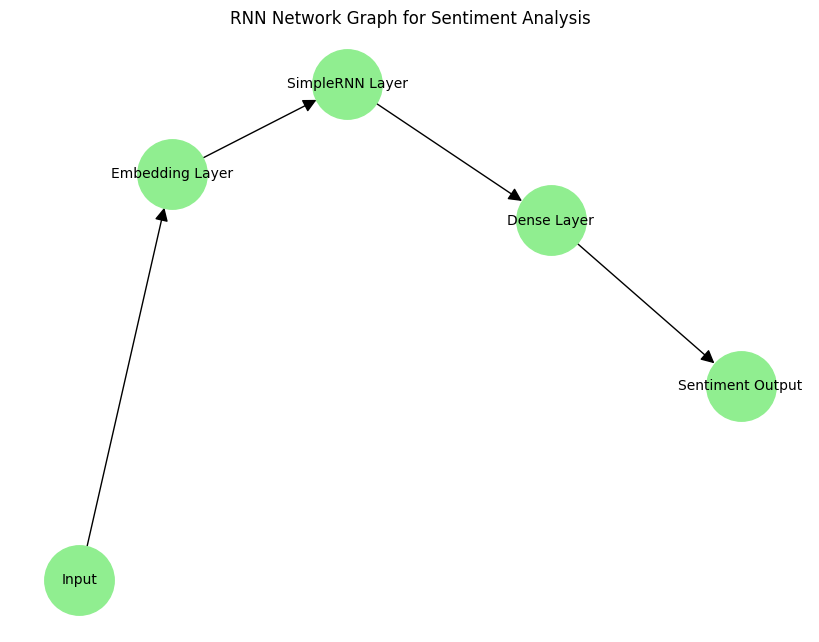

In [18]:
# Draw conceptual network graph of RNN layers
G = nx.DiGraph()

G.add_edges_from([
    ("Input", "Embedding Layer"),
    ("Embedding Layer", "SimpleRNN Layer"),
    ("SimpleRNN Layer", "Dense Layer"),
    ("Dense Layer", "Sentiment Output")
])

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2500, font_size=10, arrows=True, arrowsize=20)
plt.title("RNN Network Graph for Sentiment Analysis")
plt.show()
